0. Context

O código implementa um modelo de regressão para prever o peso dos pinguins com base em seus atributos físicos e demográficos, como tamanho, comprimento das penas e características físicas específicas. Utilizando um conjunto de dados que inclui essas variáveis, o modelo aprende a relação entre os atributos e o peso dos pinguins. O objetivo é fornecer uma estimativa precisa do peso de um pinguim com base nas suas características, ajudando a entender melhor como os atributos influenciam o peso e possibilitando previsões úteis para análises e estudos sobre a biologia dos pinguins.

 $y = f(x_i) = (\sum_{i=1}^{n} \textbf{a}_ix_i) + \textbf{b}$ 
 
 body_mass_g = f(species, bill_length_mm,..) = a1(species) + a2(ill_length_mm) +...+ b 

1. Packages and libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

2. Loads:

In [2]:
data = sns.load_dataset('penguins')

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


3. Exploratory data analysis:

3.1 Dictionary: 

In [4]:
dict_columns = {
  "species": "Coluna categórica com as espécies dos pinguins",
  "island": "Coluna categórica com os nomes das ilhas onde os pinguins foram encontrados",
  "bill_length_mm": "Coluna numérica com o comprimento do bico dos pinguins em milímetros",
  "bill_depth_mm": "Coluna numérica com a profundidade do bico dos pinguins em milímetros",
  "flipper_length_mm": "Coluna numérica com o comprimento da nadadeira dos pinguins em milímetros",
  "body_mass_g": "Coluna numérica com a massa corporal dos pinguins em gramas",
  "sex": "Coluna categórica com o sexo dos pinguins (macho ou fêmea)"
}


Critério para correlação: 
Se os pontos do gráfico de dispersão formam uma linha ascendente(correlação positiva) ou descendente(correlação negativa) para um sexo específico. Caso os pontos estejam dispersos aleatoriamente, não há correlação aparente.

3.2 Attributes by sex:

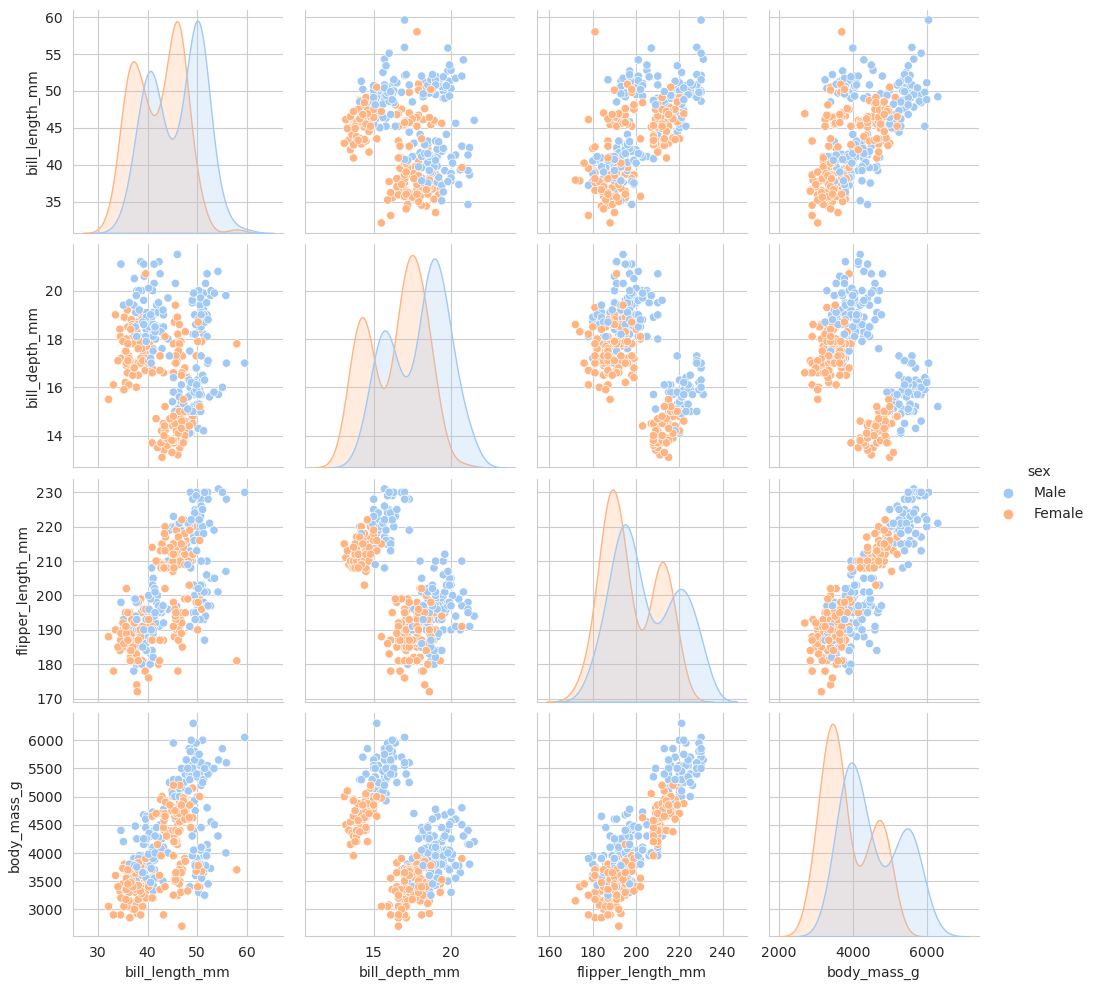

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=data, hue="sex", palette="pastel")

Machos são mais pesados. 

 bill_length_mm X body_mass_g: Machos e fêmeas aparemente possuem correlação positiva.

 bill_delpth_mm X body_mass_g: Há disperssão em grupos e em ambos os grupos há uma correlação negativa. Quão maior o peso menor a profundidade do bico.

 flipper_length_mm X body_mass_g = Machos e fêmeas com correlação positiva.

3.3 Attributes by species:

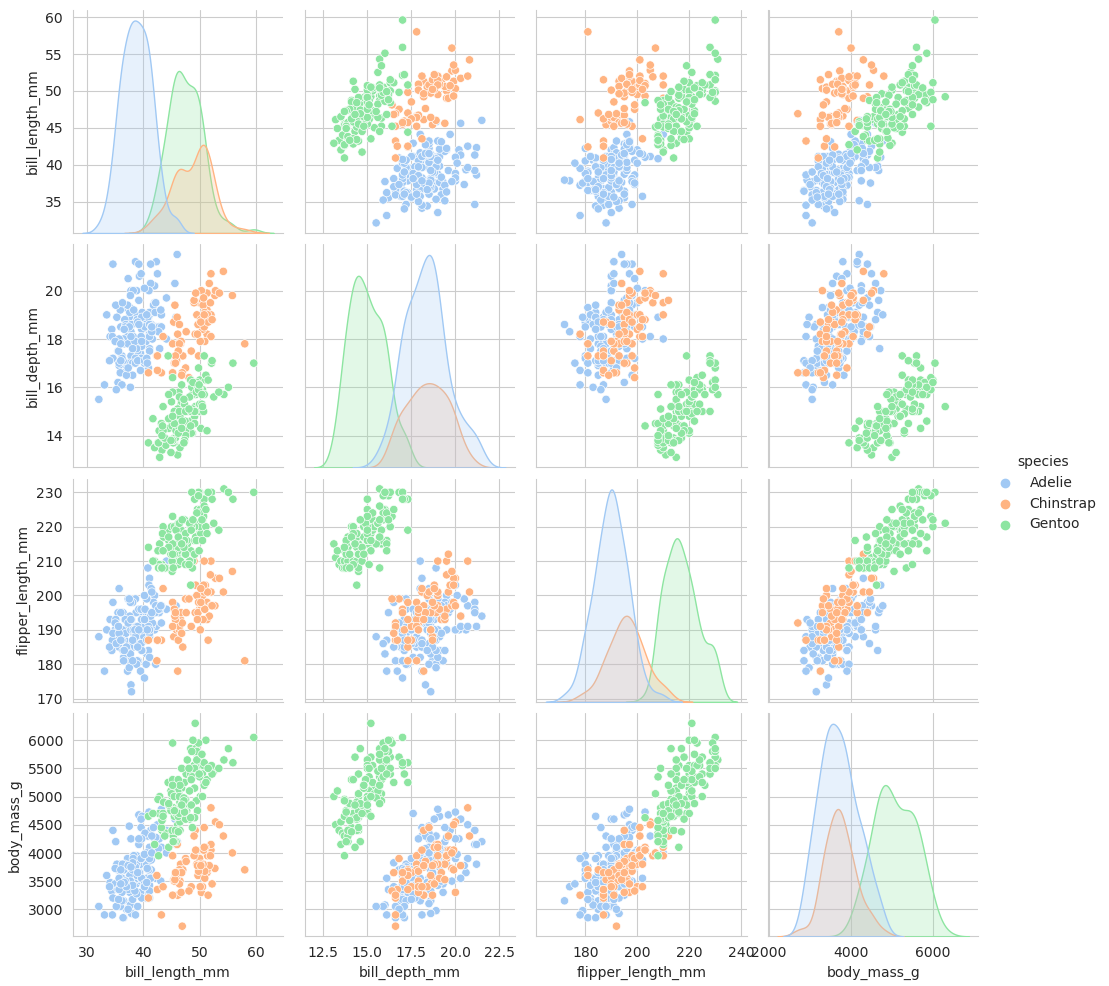

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=data, hue="species", palette="pastel")

A espécie Adelie e Chinstrap são as possuem menores massas corporais, mas Chinstrap está em menor quantidade de pinguins, enquanto Gentoo possui maior massa corporal.

bill_length_mm X body_mass_g: Ambas as espécies possuem correlação positiva.

bill_delpth_mm X body_mass_g: Ambas as espécies possuem correlação positiva.

flipper_length_mm X body_mass_g = Machos e fêmeas com correlação positiva.



3.4 Attributes by species:

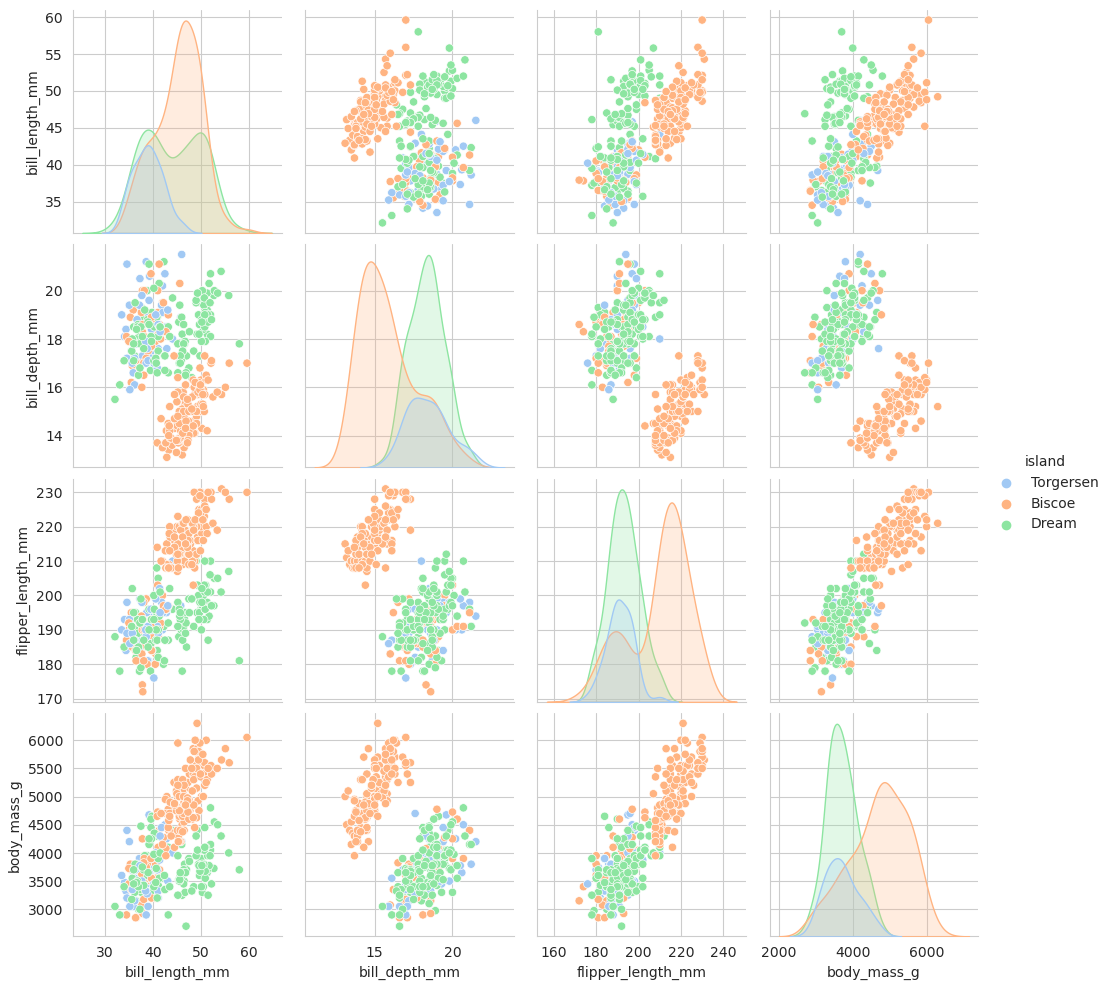

In [7]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=data, hue="island", palette="pastel")

As ilhas Torgersen e Dream possuem pinguins com menores massas corporais, sendo Dream tendo a maior quantidade de pinguins, enquanto a ilha Bisoce possui pinguins com maior quantidade de pinguins. 

bill_length_mm X body_mass_g: Ambas as espécies possuem correlação positiva.

bill_delpth_mm X body_mass_g: Ambas as espécies possuem correlação positiva.

flipper_length_mm X body_mass_g = Ambas as espécies possuem correlação positiva.



Considerações gerais:

Island e Species: 

As ilhas Torgersen e Dream apresentam pinguins com menores massas corporais, sendo que a ilha Dream tem a maior quantidade de pinguins, enquanto a ilha Biscoe também possui um número elevado de pinguins, mas sem uma relação direta com a massa corporal. Entre as espécies, as Adelie e Chinstrap são aquelas com menor massa corporal, com a Chinstrap tendo uma quantidade menor de pinguins em comparação com outras espécies. A espécie Gentoo se destaca por ter a maior massa corporal.

Correlações atributos físicos: 

O comprimento do bico (bill_length_mm) está positivamente correlacionado com a massa corporal em todas as espécies e sexos, o que indica que pinguins com bicos maiores tendem a ser mais pesados.. O comprimento da nadadeira (flipper_length_mm) segue a mesma tendência, com uma correlação positiva consistente com a massa corporal para todas as espécies e sexos, indicando que pinguins com nadadeiras maiores tendem a ter uma maior massa corporal.

Sexo:

O comprimento do bico continua apresentando uma correlação positiva com a massa corporal, mostrando que, independentemente do sexo, pinguins com bicos maiores são mais pesados. A profundidade do bico exibe uma correlação negativa em alguns grupos, indicando que pinguins mais pesados tendem a ter uma profundidade de bico menor. Já o comprimento da nadadeira mantém uma correlação positiva com a massa corporal em ambos os sexos, reforçando que pinguins com nadadeiras maiores possuem maior massa corporal.


4. Data:

4.1 Null values:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


4.1.1 Null values ​​in categorical columns:

In [9]:
# Imputando os dados da coluna 'sex' pela moda.

sex_mode = data['sex'].mode()[0]
print(sex_mode)

Male


In [10]:
# Aplicando uma função lambda na coluna 'sex' que verifica se o valor da coluna é NaN e substitue pela medo
data['sex'] = data['sex'].apply(lambda x: sex_mode if pd.isna(x) else x)

In [11]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


4.1.1 Null values ​​in numeric  columns:

In [12]:
# Calculando a média de cada coluna com atributos numéricos  

bill_lenght_mean = round(data['bill_length_mm'].mean(), 1)
print(bill_lenght_mean)
bill_depth_mean = round(data['bill_depth_mm'].mean(), 1)
print(bill_depth_mean)
flipper_lenght_mean = round(data['flipper_length_mm'].mean(), 1)
print(flipper_lenght_mean)
body_mass_mean = round(data['body_mass_g'].mean(), 1)
print(body_mass_mean)

# Preenchendo os valores NaN com o método fillna

data['bill_length_mm'].fillna(bill_lenght_mean, inplace=True)
data['bill_depth_mm'].fillna(bill_depth_mean, inplace=True)
data['flipper_length_mm'].fillna(flipper_lenght_mean, inplace=True)
data['body_mass_g'].fillna(body_mass_mean, inplace=True)

43.9
17.2
200.9
4201.8


In [13]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,43.9,17.2,200.9,4201.8,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


5. Standardization of numerical variables

In [14]:
# Calculando o desvio padrão  de cada coluna com atributos numéricos

bill_lenght_std = data['bill_length_mm'].std()
print(bill_lenght_std)
bill_depth_std = data['bill_depth_mm'].std()
print(bill_depth_std)
flipper_lenght_std = data['flipper_length_mm'].std()
print(flipper_lenght_std)

5.443643545566691
1.9690308350346468
14.020657541189514


In [15]:
# Aplicando a função de padronização

data['bill_length_mm_std'] = data['bill_length_mm'].apply(lambda x: (x - bill_lenght_mean) / bill_lenght_std)
data['bill_depth_mm_std'] = data['bill_depth_mm'].apply(lambda x: (x - bill_depth_mean) / bill_depth_std)
data['flipper_length_mm_std'] = data['flipper_length_mm'].apply(lambda x: (x - flipper_lenght_mean) / flipper_lenght_std)


In [16]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.881762,0.761796,-1.419334
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.808282,0.101573,-1.062718
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.661322,0.406291,-0.420808
3,Adelie,Torgersen,43.9,17.2,200.9,4201.8,Male,0.000000,0.000000,0.000000
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.322644,1.066515,-0.563454


6. Coding of categorical variables

In [17]:
# Aplicando One-Hot Encoding

one_hot_species = pd.get_dummies(data['species'])
one_hot_island = pd.get_dummies(data['island']) 
one_hot_sex = pd.get_dummies(data['sex'])


# Adicionando as novas variáveis binárias ao dataframe original 

data = pd.concat([data, one_hot_species], axis=1) 
data = pd.concat([data, one_hot_island], axis=1) 
data = pd.concat([data, one_hot_sex], axis=1) 
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,Female,Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.881762,0.761796,-1.419334,1,0,0,0,0,1,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.808282,0.101573,-1.062718,1,0,0,0,0,1,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.661322,0.406291,-0.420808,1,0,0,0,0,1,1,0
3,Adelie,Torgersen,43.9,17.2,200.9,4201.8,Male,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.322644,1.066515,-0.563454,1,0,0,0,0,1,1,0


In [18]:
# Obtendo os valores únicos da coluna 'species'

unique_species = data['species'].unique()
print(unique_species)

['Adelie' 'Chinstrap' 'Gentoo']


7. Dataframe cleaning:

In [19]:
# Limpando o dataframe
data = data.drop(['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'sex'], axis=1)
colunas_ordenadas = ['Adelie', 'Chinstrap', 'Gentoo', 'Biscoe', 'Dream', 'Torgersen', 'body_mass_g', 'bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std', 'Female', 'Male']

# Reordenando as colunas no DataFrame
data = data[colunas_ordenadas]

In [20]:
data.head()

,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,Female,Male
0,1,0,0,0,0,1,3750.0,-0.881762,0.761796,-1.419334,0,1
1,1,0,0,0,0,1,3800.0,-0.808282,0.101573,-1.062718,1,0
2,1,0,0,0,0,1,3250.0,-0.661322,0.406291,-0.420808,1,0
3,1,0,0,0,0,1,4201.8,0.000000,0.000000,0.000000,0,1
4,1,0,0,0,0,1,3450.0,-1.322644,1.066515,-0.563454,1,0


8. Model training & testing

8.1 Separation of database for training and testing

In [21]:
data.head()

,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,Female,Male
0,1,0,0,0,0,1,3750.0,-0.881762,0.761796,-1.419334,0,1
1,1,0,0,0,0,1,3800.0,-0.808282,0.101573,-1.062718,1,0
2,1,0,0,0,0,1,3250.0,-0.661322,0.406291,-0.420808,1,0
3,1,0,0,0,0,1,4201.8,0.000000,0.000000,0.000000,0,1
4,1,0,0,0,0,1,3450.0,-1.322644,1.066515,-0.563454,1,0


In [22]:
# Distribuindo os dados em de treino e teste utilizando a proporção 2/3 para treino e 1/3 para test

predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['body_mass_g'], axis=1), 
    data['body_mass_g'], 
    test_size=1/3, 
    random_state=123
)

In [23]:
predictors_train.shape

(229, 11)

In [24]:
predictors_test.shape

(115, 11)

In [25]:
target_train.shape

(229,)

In [26]:
target_test.shape

(115,)

8.2 Training

In [27]:
# Criando uma instância do modelo de regressão linear

model = LinearRegression()

In [28]:
#  Treina o modelo de regressão linear usando os dados de treinamento

model = model.fit(predictors_train, target_train)

In [29]:
# Obtendo os coeficientes angulares e lineares

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Adelie', 'Chinstrap', 'Gentoo', 'Biscoe', 'Dream', 'Torgersen',
        'bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'Female', 'Male'], dtype=object),
 'n_features_in_': 11,
 'coef_': array([-130.51428182, -457.39598276,  587.91026458,   62.48429669,
           6.33894073,  -68.82323742,  152.42261066,   96.74624586,
         270.52075551, -185.40567352,  185.40567352]),
 'rank_': 8,
 'singular_': array([2.38893246e+01, 1.56689013e+01, 1.19376030e+01, 5.92510241e+00,
        5.65278795e+00, 5.09781870e+00, 3.48533077e+00, 2.23849162e+00,
        1.41898111e-15, 9.94204517e-16, 2.23446171e-16]),
 'intercept_': 4130.351321044312}

9. Assessment:

In [30]:
# Gerando previsões para o conjunto de dados de teste usando o modelo treinado

target_predicted = model.predict(predictors_test)
target_predicted[0:5]

array([5747.39390351, 4696.37158418, 3881.84510612, 3241.14186131,
       3376.68803793])

In [31]:
# Calculando a raiz quadrada do erro quadrático

rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

279.625712843076


In [32]:
# Calculando a média da coluna 'body_mass_g'

mean_body_mass_g = data[['body_mass_g']].mean()
print(mean_body_mass_g)

body_mass_g    4201.754651
dtype: float64


In [33]:
# Percentual do RMSE em relação a média da coluna 'body_mass_g'

percentual_rmse = (rmse / mean_body_mass_g) * 100
print(percentual_rmse)

body_mass_g    6.654975
dtype: float64


10. Prediction:

In [34]:
data.head()

,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,Female,Male
0,1,0,0,0,0,1,3750.0,-0.881762,0.761796,-1.419334,0,1
1,1,0,0,0,0,1,3800.0,-0.808282,0.101573,-1.062718,1,0
2,1,0,0,0,0,1,3250.0,-0.661322,0.406291,-0.420808,1,0
3,1,0,0,0,0,1,4201.8,0.000000,0.000000,0.000000,0,1
4,1,0,0,0,0,1,3450.0,-1.322644,1.066515,-0.563454,1,0


In [35]:
# Padronizando os atributos numéricos do pinguim exemplo

bill_lenght_ex = (38.2 - bill_lenght_mean) / bill_lenght_std
bill_depth_ex = (18.1 - bill_depth_mean) / bill_depth_std
flipper_lenght_ex = (185.0 - flipper_lenght_mean) / flipper_lenght_std

In [36]:
# Alocando os atributos do pinguim exemplo em um array

pinguim_ex = np.array([1, 0, 0, 0, 1, 0, bill_lenght_ex, bill_depth_ex, flipper_lenght_ex, 0, 1])
print(pinguim_ex)

[ 1.          0.          0.          0.          1.          0.
 -1.04709281  0.45707766 -1.13404096  0.          1.        ]


In [37]:
# Prevendo o peso do pinguim

pinguim_ex_peso = model.predict(pinguim_ex.reshape(1, -1))
print(pinguim_ex_peso)

[3769.4199631]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
